# Assignment 2, Part B
<hr>

### 1. Decision Trees:

<h4 style="padding-left:20px">1.a:</h4>



<p style='padding-left:20px;font-family:apa;font-size:16px'>
The key difference between regression decisions trees and classification decision trees are the actual mechanisms associated with the splits, the way predictions are made and consequently how the tree is evaluated. Overall, however, the basic tree construction idea remains the same.
</p>
<p style='padding-left:20px;font-family:apa;font-size:16px'>
In terms of the actual splitting operation, regression trees will attempt to minimise the mean square error or similar measure at every split for a chosen continuous target variable. This means optimizing a continuous output value based at a set of features. An example might be targeting the amount of rainfall given various atmospheric conditions. Conversely, classification trees split with the intention of increasing class purity, whether that be by using Gini impurity, entropy, or something else. The goal here is separate the actual classes themselves. 
</p>

<h4 style="padding-left:20px">1.b:</h4>

<p style='padding-left:20px;font-family:apa;font-size:16px'>
To make predictions for new data points, a decision tree will traverse the tree, essentially starting at the top (root node) and following the path down, at each node making a decision that results in a yes or no outcome which determines which subsequent node to progress to. Eventually arriving at the end of the tree (leaf node). At this point if it is a regression tree the prediction will be the average of the target values for that leaf. Alternatively, a classification tree will choose the highest value out of all the classes.
</p>

<hr>

### 2. SVMs:

<h4 style="padding-left:20px">2.a:</h4>

<p style='padding-left:20px;font-family:apa;font-size:16px'>
SVMs work by optimizing the margin, which is the space between the given classes. The goal is to maximise the margin space or distance between the hyperplane and support vectors, where the hyperplane is the central decision line and the support vectors are the lines denoting the closest data points of either class. 
</p>

<h4 style="padding-left:20px">2.b:</h4>

<p style='padding-left:20px;font-family:apa;font-size:16px'>
When data is not linearly separable, the ‘kernel trick’ is used to translate the data points into a higher spatial dimension. For example, if the data isn’t linearly separable in 2 dimensions, translating to 3 dimensional space may provide a opportunity for curvature and the formation of a plane that divides the space and maximizes a margin across the plane, that can successfully divide the classes back in the original form.
</p>

<h4 style="padding-left:20px">2.c:</h4>

<p style='padding-left:20px;font-family:apa;font-size:16px'>
In the case of SVMs for multiclass classification problems, it could be said that there are two overall solutions, direct and indirect. To indirectly extend SVMs for multiple classes, we can implement one vs one or one vs all methods that simply perform traditional binary classification and compare the results switching out one class for another to determine the best classification. Not as popular is the direct approach which forms the decision boundary around multiple classes, however this method is more complex. Another interesting approach borrows from decision trees where each node computes an SVM operation.
</p>

<hr>

### 3. Breast Cancer detection/prediction problem:

<h4 style="padding-left:20px">3.a: Dataset description (from tutorial)</h4>

<p style='padding-left:20px;font-family:apa;font-size:16px'>
The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector. The dataset can be found in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
</p>
<p style='padding-left:20px;font-family:apa;font-size:16px'>
Attribute Information:
</p>
<p style='margin-left:10px;font-family:apa;font-size:16px'>
<ul style='margin-left:10px;font-family:apa;font-size:16px'>
<li style='margin-left:10px;font-family:apa;font-size:16px'>ID number</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>Diagnosis (M = malignant, B = benign) 3–32</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>3 - 32 Ten real-valued features are computed for each cell nucleus:</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>radius (mean of distances from center to points on the perimeter)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>texture (standard deviation of gray-scale values)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>perimeter</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>area</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>smoothness (local variation in radius lengths)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>compactness (perimeter² / area — 1.0)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>concavity (severity of concave portions of the contour)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>concave points (number of concave portions of the contour)</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>symmetry</li>
<li style='margin-left:10px;font-family:apa;font-size:16px'>fractal dimension (“coastline approximation” — 1)</li>
</ul>
</p>


<h4 style="padding-left:20px">3.b:</h4>
<h4 style="padding-left:20px">3.c:</h4>





<h4 style="padding-left:20px">3.d: Breast cancer dataset analysis and modelling</h4>

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
Import packages used for this project and configure settings
</p>

In [339]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree


pd.set_option('display.max_rows', None)

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
Load the breast cancer dataset
</p>

In [340]:
breast_cancer_dataset = load_breast_cancer()

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Importing the dataset returns a dictionary/branch object which contains 4 arrays, 3 strings and 1 nonetype
<br>- We can explore each to fully understand the provided data
</p>

In [341]:
for i, dict_value in enumerate(breast_cancer_dataset):
    dict_object = breast_cancer_dataset[dict_value]
    print(i,'\n','Name:', dict_value)
    print(' type:',type(dict_object))
    print(' shape:',dict_object.shape,'\n') if str(type(dict_object)) == "<class 'numpy.ndarray'>" else print('')

# arrays
data = breast_cancer_dataset.data
target = breast_cancer_dataset.target
target_names = breast_cancer_dataset.target_names
feature_names = breast_cancer_dataset.feature_names

# nonetype
frame = breast_cancer_dataset.frame

# strings
DESCR = breast_cancer_dataset.DESCR # description
filename = breast_cancer_dataset.filename
data_module = breast_cancer_dataset.data_module

0 
 Name: data
 type: <class 'numpy.ndarray'>
 shape: (569, 30) 

1 
 Name: target
 type: <class 'numpy.ndarray'>
 shape: (569,) 

2 
 Name: frame
 type: <class 'NoneType'>

3 
 Name: target_names
 type: <class 'numpy.ndarray'>
 shape: (2,) 

4 
 Name: DESCR
 type: <class 'str'>

5 
 Name: feature_names
 type: <class 'numpy.ndarray'>
 shape: (30,) 

6 
 Name: filename
 type: <class 'str'>

7 
 Name: data_module
 type: <class 'str'>



<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- This will later become our target variable dataframe (i.e. Y response variable)
</p>

In [342]:
target = pd.DataFrame(target, columns=['target'])
target.tail(20)

,target
549,1
550,1
551,1
552,1
553,1
554,1
555,1
556,1
557,1
558,1


In [343]:
print(target_names)

['malignant' 'benign']


In [344]:
feature_names = pd.DataFrame(feature_names, columns=['feature_names'])
feature_names

,feature_names
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- The DESCR string object contains a helpful description
</p>

In [345]:
print(DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- We will convert the data numpy array to a dataframe which is the main object we will be working with
<br>- Also convert the target array to a dataframe
<br>- We can also specify the feature_names object as the headings which works well
</p>

In [346]:
bc_df = pd.DataFrame(data, columns=feature_names)
bc_target = pd.DataFrame(target, columns=['target'])
bc_df.tail(20)

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)",...,"(worst radius,)","(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)"
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,...,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,...,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,13.890,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004


<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Perform a classic train/test split
</p>

In [347]:
X_train, X_test, y_train, y_test = train_test_split(bc_df, bc_target, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Define the models
</p>

In [348]:
dt_model = DecisionTreeClassifier()

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Train the models
</p>

In [349]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Make predictions on the test data
</p>

In [350]:
dt_y_pred= dt_model.predict(X_test)

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Evaluate the models
</p>

In [351]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))
print("Precision:",metrics.precision_score(y_test, dt_y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, dt_y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, dt_y_pred, average = 'weighted'))

report = classification_report(y_test, dt_y_pred, target_names = target_names)
print(report)


Accuracy: 0.9473684210526315
Precision: 0.9473684210526315
Recall: 0.9473684210526315
F1-score: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Parameter tuning
</p>

In [352]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}
grs = GridSearchCV(dt_model, param_grid=params)
grs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Output the optimal values
</p>

In [353]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 5}


<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Make a prediction and calculate metrics
</p>

In [354]:
dt_model = grs.best_estimator_
dt_y_pred=dt_model.predict(X_test)

<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Evaluate the model after optimization
</p>

In [355]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))
print("Precision:",metrics.precision_score(y_test, dt_y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, dt_y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, dt_y_pred, average = 'weighted'))

Accuracy: 0.956140350877193
Precision: 0.9569049312470365
Recall: 0.956140350877193
F1-score: 0.9558014271241044


<p style="margin-left:40px;padding:4px;font-family:arial;color:white;background-color:#6252a8;">
- Visualize the decision tree
</p>

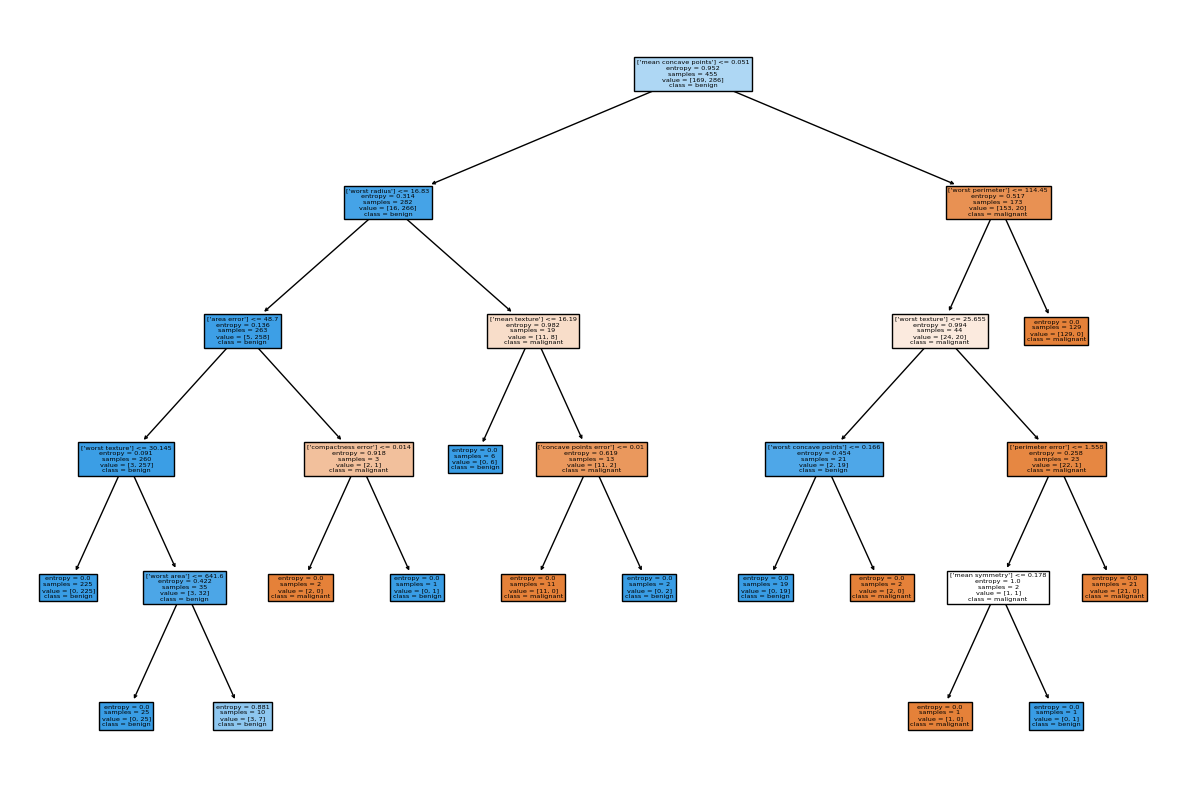

In [365]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_model, 
                   filled=True,
                   feature_names= feature_names.values.tolist() if str(type(feature_names)) != "list" else feature_names,
                   class_names= target_names.tolist() if str(type(target_names)) != "list" else target_names
                   )